In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *
from cellink.tl._eqtl import _get_pb_data
from plotnine import *
from itertools import islice
from plotting_report import *

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
out_path = Path("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/")
eigenvec = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/pcdir/wgs.dose.filtered.R2_0.8.filtered.pruned.eigenvec", sep=' ', header=None)
save_dir = out_path / "data_plots/pb_expression"
df_burdens = pd.read_parquet(out_path/"burdens/all_burdens_newest.parquet")
all_results = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_newest.csv")


Getting PB CD8 ET
[2025-02-04 11:38:27,756] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-02-04 11:38:27,757] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2025-02-04 11:38:27,757] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
Getting PB CD8 NC
[2025-02-04 11:38:33,218] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-02-04 11:38:33,219] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2025-02-04 11:38:33,219] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
Getting PB CD8 ET
[2025-02-04 11:38:41,336] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-02-04 11:38:41,337] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2025-02-04 11:38:41,337] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
Getting PB CD8 NC
[2025-02-04 11:38:46,680] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-02-04 11:38:46,681

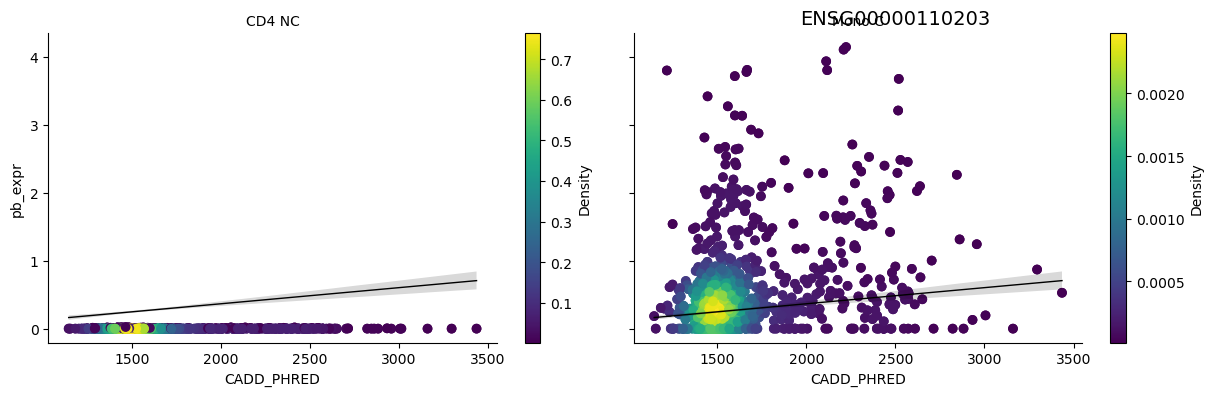

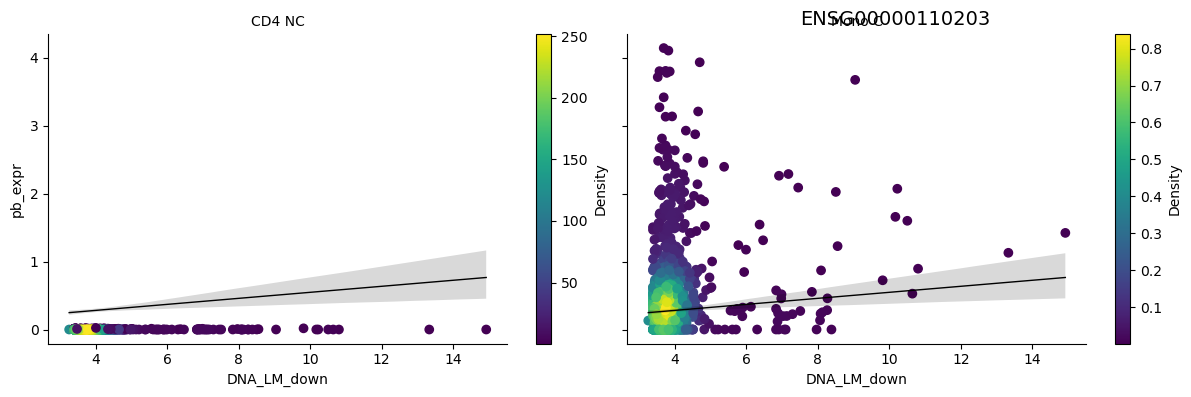

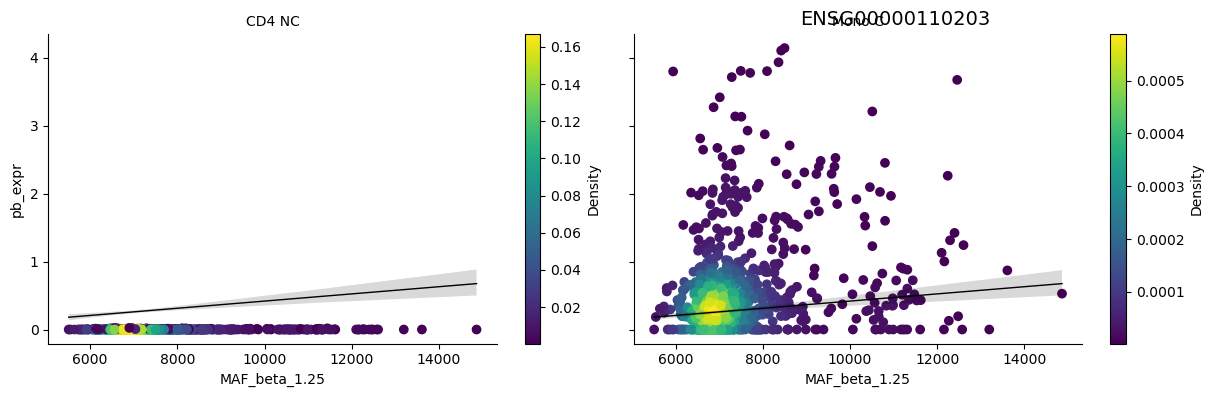

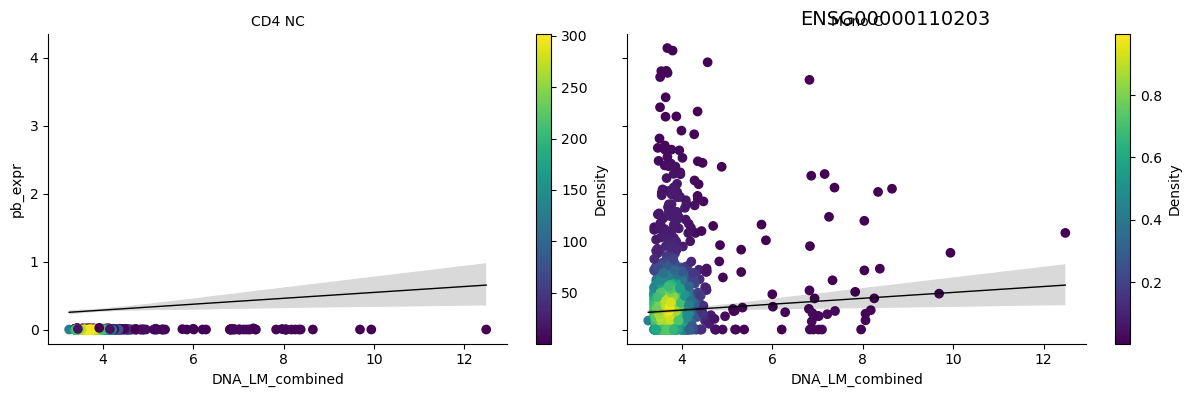

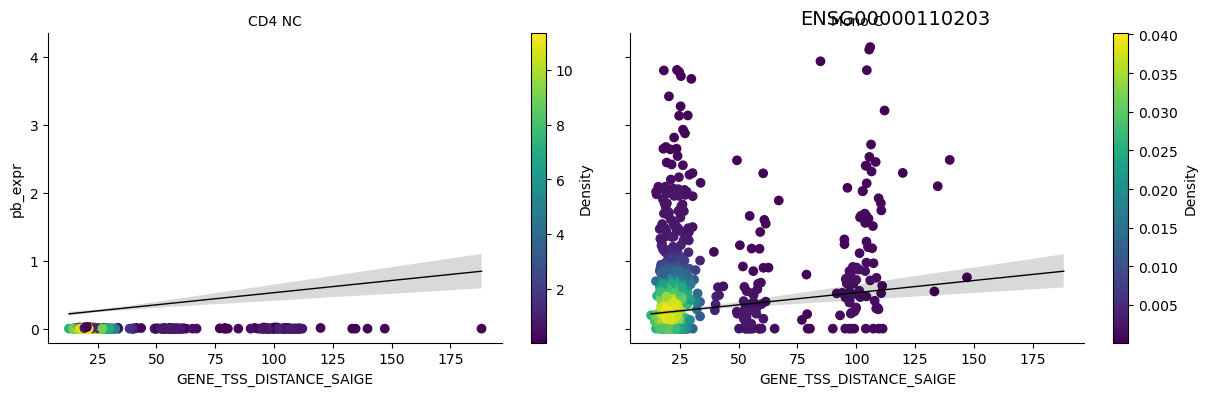

In [4]:
chrom = "11"
data = pd.read_pickle(out_path/f"annotations/chr{chrom}_data.pkl")
df_burdens_chrom = df_burdens[df_burdens["Chromosome"] == chrom]

this_genes=["ENSG00000110203"]
get_pb_plots(data, df_burdens_chrom, eigenvec, chrom, gene_list=this_genes)#, save_dir=save_dir)


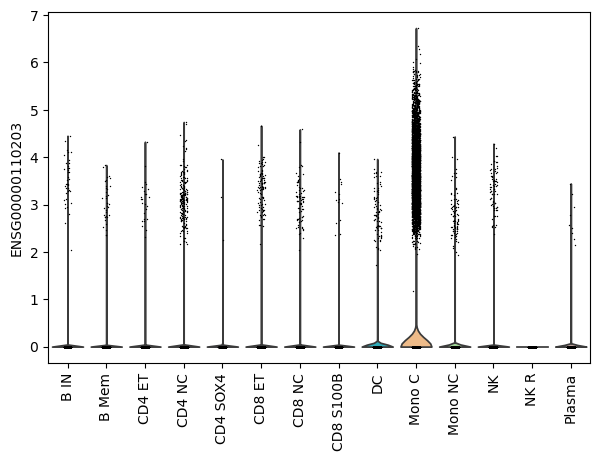

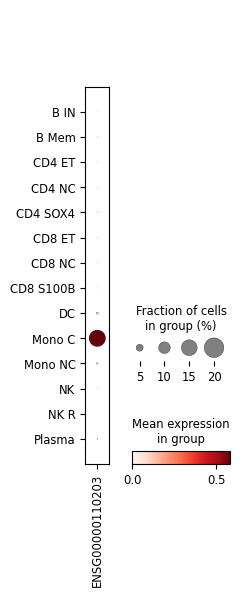

In [8]:
adata_filtered = data.adata[~data.adata.obs["cell_label"].isin(["Platelets", "Erythrocytes"])]
sc.pl.violin(adata_filtered, keys=["ENSG00000110203"],
             groupby="cell_label",
             rotation=90
            )
sc.pl.dotplot(
    adata_filtered, 
    var_names=["ENSG00000110203"],  # Gene you want to plot
    groupby="cell_label",            # Group by cell type
    dendrogram=False
)